In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

from os import listdir, mkdir, getcwd
from os.path import isfile, join, basename, isdir

from sys import platform
#if platform == "linux" or platform == "linux2":
#    import ROOT
#    %jsroot off

from analysis.convert_directory import convert_directory
from analysis.split_event_tree import split_event_tree,ttype_column

Welcome to JupyROOT 6.26/10


In [2]:
source_path = getcwd() # "/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/ZHH/"
output_path = join(source_path, ".npy")

convert_directory(source_path, "dataTree", output_path)

Skipping file <compare_out_jet.root> (exists)
Skipping file <compare_out_mcparticle.root> (exists)


In [3]:
files = list(map(lambda e: join(output_path, e), listdir(output_path)))
files

['/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/.npy/compare_out_jet.root.npy',
 '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/.npy/compare_out_mcparticle.root.npy']

In [4]:
data_jet = pd.DataFrame(np.load(files[0], allow_pickle=True))
ttype_column(data_jet)
data_jet.columns

Index(['run', 'event', 'is_zhh', 'is_zzh', 'h1_decay_pdg', 'z2_decay_pdg',
       'zhh_sigma', 'zhh_sigmall', 'zhh_sigmalr', 'zhh_sigmarl', 'zhh_sigmarr',
       'zhh_mz', 'zhh_mhh', 'zhh_mzhh', 'zhh_phi', 'zhh_phif', 'zhh_phih',
       'zhh_costheta', 'zhh_costhetaf', 'zhh_costhetah', 'zhh_l1_e',
       'zhh_l1_px', 'zhh_l1_py', 'zhh_l1_pz', 'zhh_l2_e', 'zhh_l2_px',
       'zhh_l2_py', 'zhh_l2_pz', 'zhh_h1_e', 'zhh_h1_px', 'zhh_h1_py',
       'zhh_h1_pz', 'zhh_h2_e', 'zhh_h2_px', 'zhh_h2_py', 'zhh_h2_pz',
       'zzh_sigma', 'zzh_sigmalll', 'zzh_sigmallr', 'zzh_sigmalrl',
       'zzh_sigmalrr', 'zzh_sigmarrr', 'zzh_sigmarrl', 'zzh_sigmarlr',
       'zzh_sigmarll', 'zzh_mz1', 'zzh_mz2', 'zzh_mzz', 'zzh_mzzh', 'zzh_phi',
       'zzh_phiz', 'zzh_phiz1f', 'zzh_phiz2f', 'zzh_costheta', 'zzh_costhetaz',
       'zzh_costhetaz1f', 'zzh_costhetaz2f', 'zzh_l1_e', 'zzh_l1_px',
       'zzh_l1_py', 'zzh_l1_pz', 'zzh_l2_e', 'zzh_l2_px', 'zzh_l2_py',
       'zzh_l2_pz', 'zzh_z2f1_e', 'zzh_z2f1_px', 

In [5]:
data = pd.DataFrame(np.load(files[1], allow_pickle=True))
ttype_column(data)
data.columns

Index(['run', 'event', 'is_zhh', 'is_zzh', 'h1_decay_pdg', 'z2_decay_pdg',
       'zhh_sigma', 'zhh_sigmall', 'zhh_sigmalr', 'zhh_sigmarl', 'zhh_sigmarr',
       'zhh_mz', 'zhh_mhh', 'zhh_mzhh', 'zhh_phi', 'zhh_phif', 'zhh_phih',
       'zhh_costheta', 'zhh_costhetaf', 'zhh_costhetah', 'zhh_l1_e',
       'zhh_l1_px', 'zhh_l1_py', 'zhh_l1_pz', 'zhh_l2_e', 'zhh_l2_px',
       'zhh_l2_py', 'zhh_l2_pz', 'zhh_h1_e', 'zhh_h1_px', 'zhh_h1_py',
       'zhh_h1_pz', 'zhh_h2_e', 'zhh_h2_px', 'zhh_h2_py', 'zhh_h2_pz',
       'zzh_sigma', 'zzh_sigmalll', 'zzh_sigmallr', 'zzh_sigmalrl',
       'zzh_sigmalrr', 'zzh_sigmarrr', 'zzh_sigmarrl', 'zzh_sigmarlr',
       'zzh_sigmarll', 'zzh_mz1', 'zzh_mz2', 'zzh_mzz', 'zzh_mzzh', 'zzh_phi',
       'zzh_phiz', 'zzh_phiz1f', 'zzh_phiz2f', 'zzh_costheta', 'zzh_costhetaz',
       'zzh_costhetaz1f', 'zzh_costhetaz2f', 'zzh_l1_e', 'zzh_l1_px',
       'zzh_l1_py', 'zzh_l1_pz', 'zzh_l2_e', 'zzh_l2_px', 'zzh_l2_py',
       'zzh_l2_pz', 'zzh_z2f1_e', 'zzh_z2f1_px', 

In [6]:
data.dtypes

run               int32
event             int32
is_zhh            int32
is_zzh            int32
h1_decay_pdg      int32
                 ...   
zzh_h_e         float64
zzh_h_px        float64
zzh_h_py        float64
zzh_h_pz        float64
true_type        object
Length: 78, dtype: object

In [9]:
data.loc[:, "zzh_sigmalr"] = data["zzh_sigmalrl"] + data["zzh_sigmalrr"]

In [12]:
data[["zhh_sigmall", "zhh_sigmalr", "zhh_sigmarl", "zhh_sigmarr"]]

,zhh_sigmall,zhh_sigmalr,zhh_sigmarl,zhh_sigmarr
0,6.965651e-14,3.789516e-15,3.805584e-15,3.664363e-14
1,3.575435e-15,4.548957e-16,4.571881e-16,1.876507e-15
2,2.816861e-14,2.887418e-14,2.887788e-14,1.483737e-14
3,1.461537e-15,4.484724e-15,4.473190e-15,7.729396e-16
4,1.136108e-14,1.201230e-15,1.202365e-15,5.982262e-15
...,...,...,...,...
19895,6.397861e-14,5.120447e-14,5.121325e-14,3.370221e-14
19896,4.225487e-15,7.344578e-17,7.257845e-17,2.231687e-15
19897,2.701139e-18,1.188999e-17,1.231245e-17,1.299328e-18
19898,2.739391e-15,4.528533e-14,4.528269e-14,1.443773e-15


In [14]:
data[["zzh_sigmalll", "zzh_sigmallr", "zzh_sigmalrl", "zzh_sigmalrr", "zzh_sigmarrr", "zzh_sigmarrl", "zzh_sigmarlr", "zzh_sigmarll"]]

,zzh_sigmalll,zzh_sigmallr,zzh_sigmalrl,zzh_sigmalrr,zzh_sigmarrr,zzh_sigmarrl,zzh_sigmarlr,zzh_sigmarll
0,2.360463e-18,2.299130e-21,1.436123e-18,1.412996e-21,2.964458e-20,2.664332e-20,3.416907e-20,3.131037e-20
1,1.818348e-20,6.257151e-23,1.592597e-21,1.142374e-22,2.281028e-22,7.272800e-22,3.781793e-23,2.527525e-21
2,2.476070e-19,7.320700e-19,3.026426e-19,2.296818e-19,1.849862e-20,1.429809e-18,4.294601e-20,8.521268e-19
3,3.087851e-23,1.186070e-20,1.536927e-20,3.008866e-21,2.363798e-24,2.316518e-20,2.181334e-21,1.117694e-20
4,1.497434e-21,2.932834e-23,3.150571e-21,2.331277e-24,1.874807e-23,3.416760e-22,7.501332e-23,5.148344e-23
...,...,...,...,...,...,...,...,...
19895,5.393716e-18,1.559466e-20,5.004834e-19,5.268343e-20,6.753430e-20,1.832570e-19,1.196196e-20,1.163772e-18
19896,1.239753e-19,1.888124e-21,3.037344e-20,1.998824e-23,1.552709e-21,2.200311e-20,7.233385e-22,4.434603e-22
19897,2.974406e-22,3.078431e-24,2.570919e-22,3.013842e-23,2.218011e-23,5.915269e-24,3.642844e-23,1.124641e-22
19898,7.307150e-22,1.192342e-20,6.059608e-19,9.067453e-20,5.479775e-23,2.328788e-20,8.601478e-20,3.363567e-19


In [33]:
mz2 = np.sqrt((data["zzh_z2f1_e"] + data["zzh_z2f2_e"])**2 - ( (data["zzh_z2f1_px"] + data["zzh_z2f2_px"])**2 + (data["zzh_z2f1_py"] + data["zzh_z2f2_py"])**2 + (data["zzh_z2f1_pz"] + data["zzh_z2f2_pz"])**2))

In [31]:
mz2

0         91.624590
1         86.658535
2         91.065786
3         90.194484
4        117.162606
            ...    
19895     91.322469
19896     90.539090
19897     89.054628
19898     92.263557
19899    149.585628
Length: 19900, dtype: float64

In [34]:
data[["zzh_mz2h", "zhh_mhh", "zzh_mz2"]]

,zzh_mz2h,zhh_mhh,zzh_mz2
0,395.216599,328.174042,91.624596
1,412.455505,283.207367,86.658531
2,292.626663,254.630463,91.065773
3,402.259918,300.932007,90.194481
4,305.130836,284.122345,117.162605
...,...,...,...
19895,399.136185,327.229431,91.322479
19896,403.333870,356.851379,90.539093
19897,385.760636,360.337097,89.054634
19898,398.523796,343.710114,92.263557


In [18]:
true_zzh = data[(data["is_zzh"] == 1) & (data["zhh_sigma"] > 0) & (data["zzh_sigma"] > 0)].copy()
true_zhh = data[(data["is_zhh"] == 1) & (data["zhh_sigma"] > 0) & (data["zzh_sigma"] > 0)].copy()

In [19]:
true_zzh["zhh_nll"] = -np.log(true_zzh["zhh_sigma"])
true_zzh["zzh_nll"] = -np.log(true_zzh["zzh_sigma"])
true_zzh["llr"]     = np.log(true_zzh["zzh_sigma"]/true_zzh["zhh_sigma"])
true_zzh.reset_index(drop=True, inplace=True)

true_zhh["zhh_nll"] = -np.log(true_zhh["zhh_sigma"])
true_zhh["zzh_nll"] = -np.log(true_zhh["zzh_sigma"])
true_zhh["llr"]     = np.log(true_zhh["zzh_sigma"]/true_zhh["zhh_sigma"])
true_zhh.reset_index(drop=True, inplace=True)

<Axes: xlabel='zzh_mz1', ylabel='zzh_mz2'>

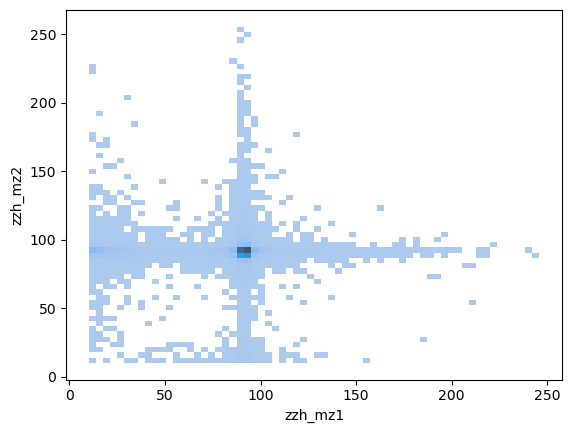

In [20]:
sns.histplot(true_zzh, x="zzh_mz1", y="zzh_mz2", bins=(64, 64))

<Axes: xlabel='zhh_mz', ylabel='zhh_mhh'>

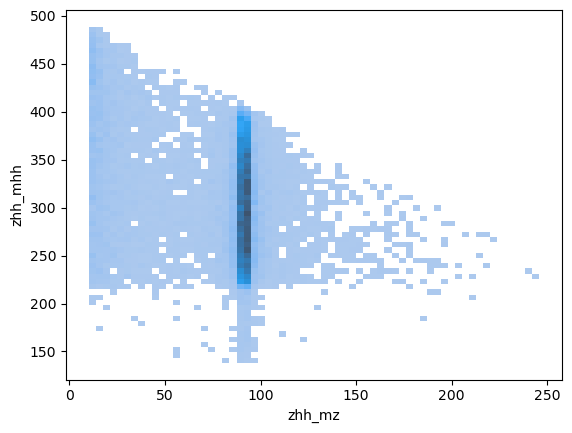

In [21]:
sns.histplot(true_zzh, x="zhh_mz", y="zhh_mhh", bins=(64, 64))

In [14]:
def plot_nll(zhh_nll, zzh_nll, xlabel="nll", units=""):
    g_min = min(zhh_nll.min(), zzh_nll.min())
    g_max = max(zhh_nll.max(), zzh_nll.max())
    
    canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
    hist_zhh = ROOT.TH1D("ZHH MCTruth (Red)", "Likelihood-Analysis", 64, g_min, g_max)
    hist_zzh = ROOT.TH1D("ZZH MCTruth (Blue)", "Likelihood-Analysis", 64, g_min, g_max)

    xaxis = hist_zhh.GetXaxis()
    xaxis.SetTitle(xlabel + (" [" + units + "]" if units != "" else ""))

    for i in zhh_nll:
        hist_zhh.Fill(i)

    for i in zzh_nll:
        hist_zzh.Fill(i)

    hist_zhh.SetFillStyle(3004)
    hist_zhh.SetFillColorAlpha(ROOT.kRed, 0.35)
    hist_zhh.SetLineColor(ROOT.kRed)

    hist_zzh.SetFillStyle(3004)
    hist_zzh.SetFillColorAlpha(ROOT.kBlue, 0.35)
    hist_zzh.SetLineColor(ROOT.kBlue)

    hist_zhh.Draw()
    hist_zzh.Draw("sames")
    canv.Draw()

    ROOT.gPad.Update()

    # Adjust statsbox; possible only after drawing
    # See https://root.cern.ch/doc/master/classTPaveStats.html
    statsbox_zhh = hist_zhh.FindObject("stats")
    statsbox_zhh.SetX1NDC(0.7)
    statsbox_zhh.SetX2NDC(0.95)
    statsbox_zhh.SetY1NDC(0.75)
    statsbox_zhh.SetY2NDC(0.88)

    lol = statsbox_zhh.GetListOfLines()
    ttxt = statsbox_zhh.GetLineWith("Entries")
    ttxt.SetTextColor(ROOT.kRed)
    #lol.Remove(ttxt)

    statsbox_zzh = hist_zzh.FindObject("stats")
    statsbox_zhh.GetListOfLines()[1].SetTextColor(ROOT.kRed)
    statsbox_zzh.SetX1NDC(0.7)
    statsbox_zzh.SetX2NDC(0.95)
    statsbox_zzh.SetY1NDC(0.6)
    statsbox_zzh.SetY2NDC(0.73)

    hist_zhh.SetStats(0)
    canv.Modified()
    canv.Update()

    return [canv, hist_zzh, hist_zhh]

25.050545482055178 58.58955054759094


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH MCTruth (Red) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH MCTruth (Blue) (Potential memory leak).


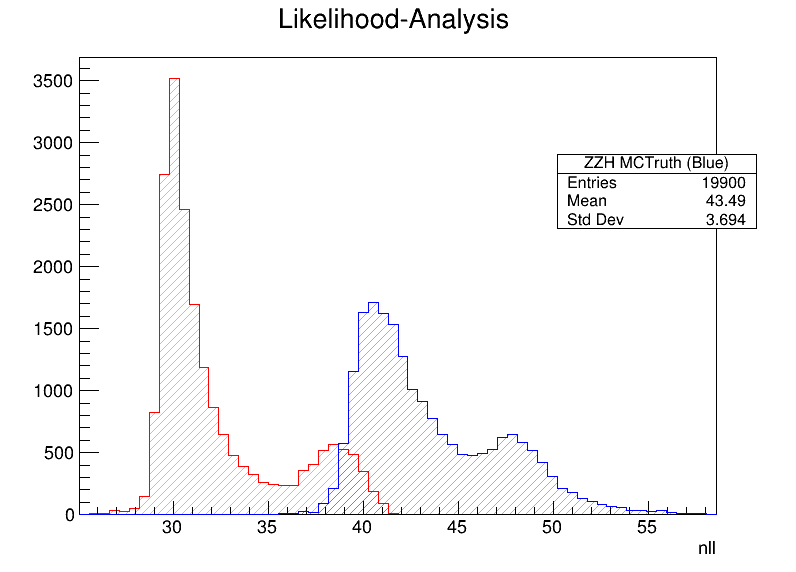

: 

In [22]:
plot_nll(true_zzh["zhh_nll"], true_zzh["zzh_nll"])

In [9]:
data["h1z2_decay_pdg"] = data["h1_decay_pdg"] + data["z2_decay_pdg"]

Text(0.5, 1.0, 'MCParticle data')

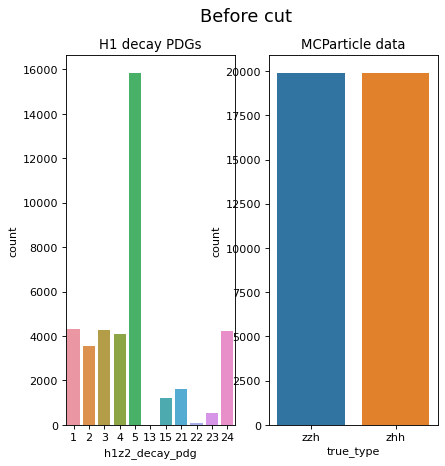

In [10]:
d = data
fig, axes = plt.subplots(1,2, figsize=(6, 6), dpi=80)
fig.suptitle("Before cut", fontsize=16)

ax = sns.countplot(d, x="h1z2_decay_pdg", ax=axes[0])
ax.set_title("H1 decay PDGs")

ax = sns.countplot(d, x="true_type", ax=axes[1])
ax.set_title("MCParticle data")

Important: Unaccounted/"thrown away" events: H->gg,gammagamma,ZZ,W+W-

In [12]:
# Show amount of thrown-away entries
selection = data[(data["zhh_sigma"] <= 0) | (data["zzh_sigma"] <= 0)]
print("Throwing away", len(selection)/len(data)*100, "% of all events")

Throwing away 16.28391959798995 % of all events


In [14]:
# Applying cut
data_cut = data.loc[(data["zhh_sigma"] > 0) & (data["zzh_sigma"] > 0)].copy()
data_cut.shape

data_jet_cut = data_jet.loc[(data_jet["zhh_sigma"] > 0) & (data_jet["zzh_sigma"] > 0)].copy()
data_jet_cut.shape

(6276, 78)

In [42]:
data_cut["zhh_nll"] = -np.log(data_cut["zhh_sigma"])
data_cut["zzh_nll"] = -np.log(data_cut["zzh_sigma"])
data_cut["llr"]     = np.log(data_cut["zzh_sigma"]/data_cut["zhh_sigma"])
data_cut.reset_index(drop=True, inplace=True)

data_jet_cut["zhh_nll"] = -np.log(data_jet_cut["zhh_sigma"])
data_jet_cut["zzh_nll"] = -np.log(data_jet_cut["zzh_sigma"])
data_jet_cut["llr"]     = np.log(data_jet_cut["zzh_sigma"]/data_jet_cut["zhh_sigma"])
data_jet_cut.reset_index(drop=True, inplace=True)

Text(0.5, 0, 'ln(L_0/L_1)')

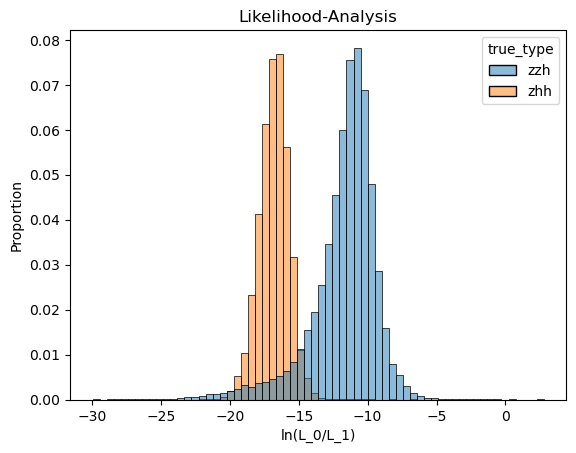

In [16]:
ax = sns.histplot(data_cut, x="llr", hue="true_type", bins=64, stat="proportion")
ax.set_title("Likelihood-Analysis")
ax.set_xlabel("ln(L_0/L_1)")

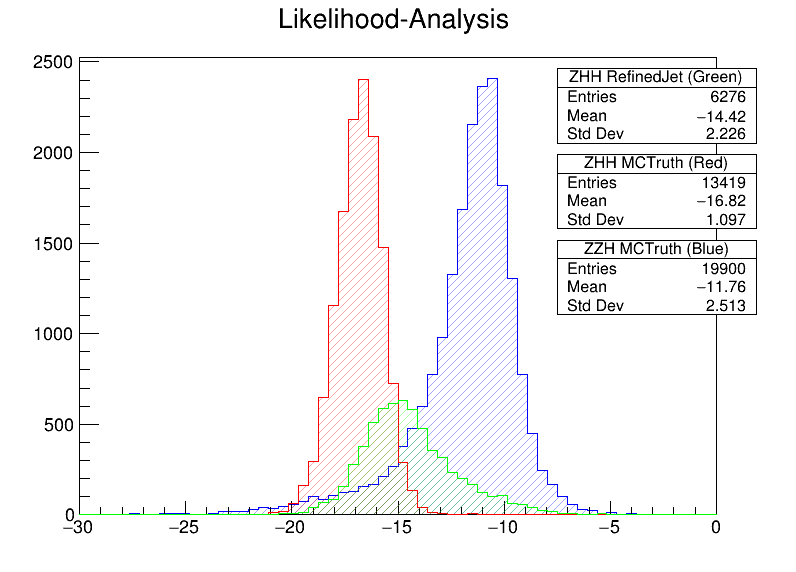

In [14]:
canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
hist_zzh = ROOT.TH1D("ZZH MCTruth (Blue)", "Likelihood-Analysis", 64, -30, 0)
hist_zhh = ROOT.TH1D("ZHH MCTruth (Red)", "Likelihood-Analysis", 64, -30, 0)
hist_zhh_jet = ROOT.TH1D("ZHH RefinedJet (Green)", "Likelihood-Analysis", 64, -30, 0)

llr = data_cut["llr"]
ttype = data_cut["true_type"]
for i in range(0, len(llr)):
    if ttype[i] == "zzh":
        hist_zzh.Fill(llr[i])
    elif ttype[i] == "zhh":
        hist_zhh.Fill(llr[i])

llr = data_jet_cut["llr"]
ttype = data_jet_cut["true_type"]
for i in range(0, len(llr)):
    hist_zhh_jet.Fill(llr[i])

hist_zzh.SetFillStyle(3004)
hist_zzh.SetFillColorAlpha(ROOT.kBlue, 0.35)
hist_zzh.SetLineColor(ROOT.kBlue)

hist_zhh.SetFillStyle(3004)
hist_zhh.SetFillColorAlpha(ROOT.kRed, 0.35)
hist_zhh.SetLineColor(ROOT.kRed)

hist_zhh_jet.SetFillStyle(3004)
hist_zhh_jet.SetFillColorAlpha(ROOT.kGreen, 0.35)
hist_zhh_jet.SetLineColor(ROOT.kGreen)

hist_zzh.Draw()
hist_zhh.Draw("sames")
hist_zhh_jet.Draw("sames")
canv.Draw()

ROOT.gPad.Update()

# Adjust statsbox; possible only after drawing
# See https://root.cern.ch/doc/master/classTPaveStats.html
statsbox_zhh_jet = hist_zhh_jet.FindObject("stats")
statsbox_zhh_jet.SetX1NDC(0.7)
statsbox_zhh_jet.SetX2NDC(0.95)
statsbox_zhh_jet.SetY1NDC(0.75)
statsbox_zhh_jet.SetY2NDC(0.88)

statsbox_zhh = hist_zhh.FindObject("stats")
statsbox_zhh.SetX1NDC(0.7)
statsbox_zhh.SetX2NDC(0.95)
statsbox_zhh.SetY1NDC(0.6)
statsbox_zhh.SetY2NDC(0.73)

statsbox_zzh = hist_zzh.FindObject("stats")
statsbox_zhh.GetListOfLines()[1].SetTextColor(ROOT.kRed)
statsbox_zzh.SetX1NDC(0.7)
statsbox_zzh.SetX2NDC(0.95)
statsbox_zzh.SetY1NDC(0.45)
statsbox_zzh.SetY2NDC(0.58)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH (Red) (Potential memory leak).


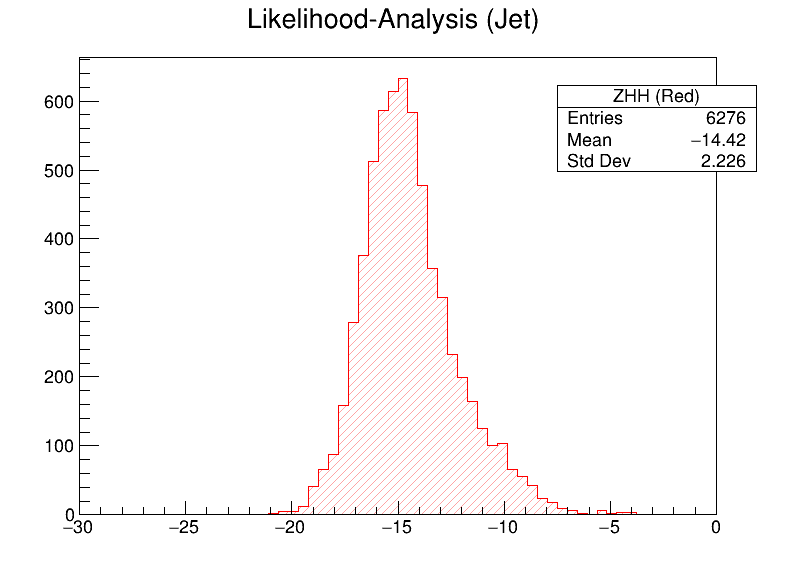

In [102]:
canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
hist_zhh = ROOT.TH1D("ZHH (Red)", "Likelihood-Analysis (Jet)", 64, -30, 0)

llr = data_cut["llr"]
ttype = data_cut["true_type"]
for i in range(0, len(llr)):
    if ttype[i] == "zhh":
        hist_zhh.Fill(llr[i])

hist_zhh.SetFillStyle(3004)
hist_zhh.SetFillColorAlpha(ROOT.kRed, 0.35)
hist_zhh.SetLineColor(ROOT.kRed)

hist_zhh.Draw()
canv.Draw()

ROOT.gPad.Update()

# Adjust statsbox; possible only after drawing
# See https://root.cern.ch/doc/master/classTPaveStats.html
statsbox_zhh = hist_zhh.FindObject("stats")
statsbox_zhh.SetX1NDC(0.7)
statsbox_zhh.SetX2NDC(0.95)
statsbox_zhh.SetY1NDC(0.7)
statsbox_zhh.SetY2NDC(0.85)

In [ ]:
canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
hist_zzh = ROOT.TH1D("ZZH (Blue)", "Likelihood-Analysis (MCParticle)", 64, -30, 0)
hist_zhh = ROOT.TH1D("ZHH (Red)", "Likelihood-Analysis", 64, -30, 0)

llr = data_cut["llr"]
ttype = data_cut["true_type"]
for i in range(0, len(llr)):
    if ttype[i] == "zzh":
        hist_zzh.Fill(llr[i])
    elif ttype[i] == "zhh":
        hist_zhh.Fill(llr[i])

hist_zzh.SetFillStyle(3004)
hist_zzh.SetFillColorAlpha(ROOT.kBlue, 0.35)
hist_zzh.SetLineColor(ROOT.kBlue)

hist_zhh.SetFillStyle(3004)
hist_zhh.SetFillColorAlpha(ROOT.kRed, 0.35)
hist_zhh.SetLineColor(ROOT.kRed)

hist_zzh.Draw()
hist_zhh.Draw("sames")
canv.Draw()

ROOT.gPad.Update()

# Adjust statsbox; possible only after drawing
# See https://root.cern.ch/doc/master/classTPaveStats.html
statsbox_zhh = hist_zhh.FindObject("stats")
statsbox_zhh.SetX1NDC(0.7)
statsbox_zhh.SetX2NDC(0.95)
statsbox_zhh.SetY1NDC(0.7)
statsbox_zhh.SetY2NDC(0.85)

statsbox_zzh = hist_zzh.FindObject("stats")
statsbox_zhh.GetListOfLines()[1].SetTextColor(ROOT.kRed)
statsbox_zzh.SetX1NDC(0.7)
statsbox_zzh.SetX2NDC(0.95)
statsbox_zzh.SetY1NDC(0.5)
statsbox_zzh.SetY2NDC(0.65)

Text(0.5, 1.0, 'ZHH vs ZZH LR')

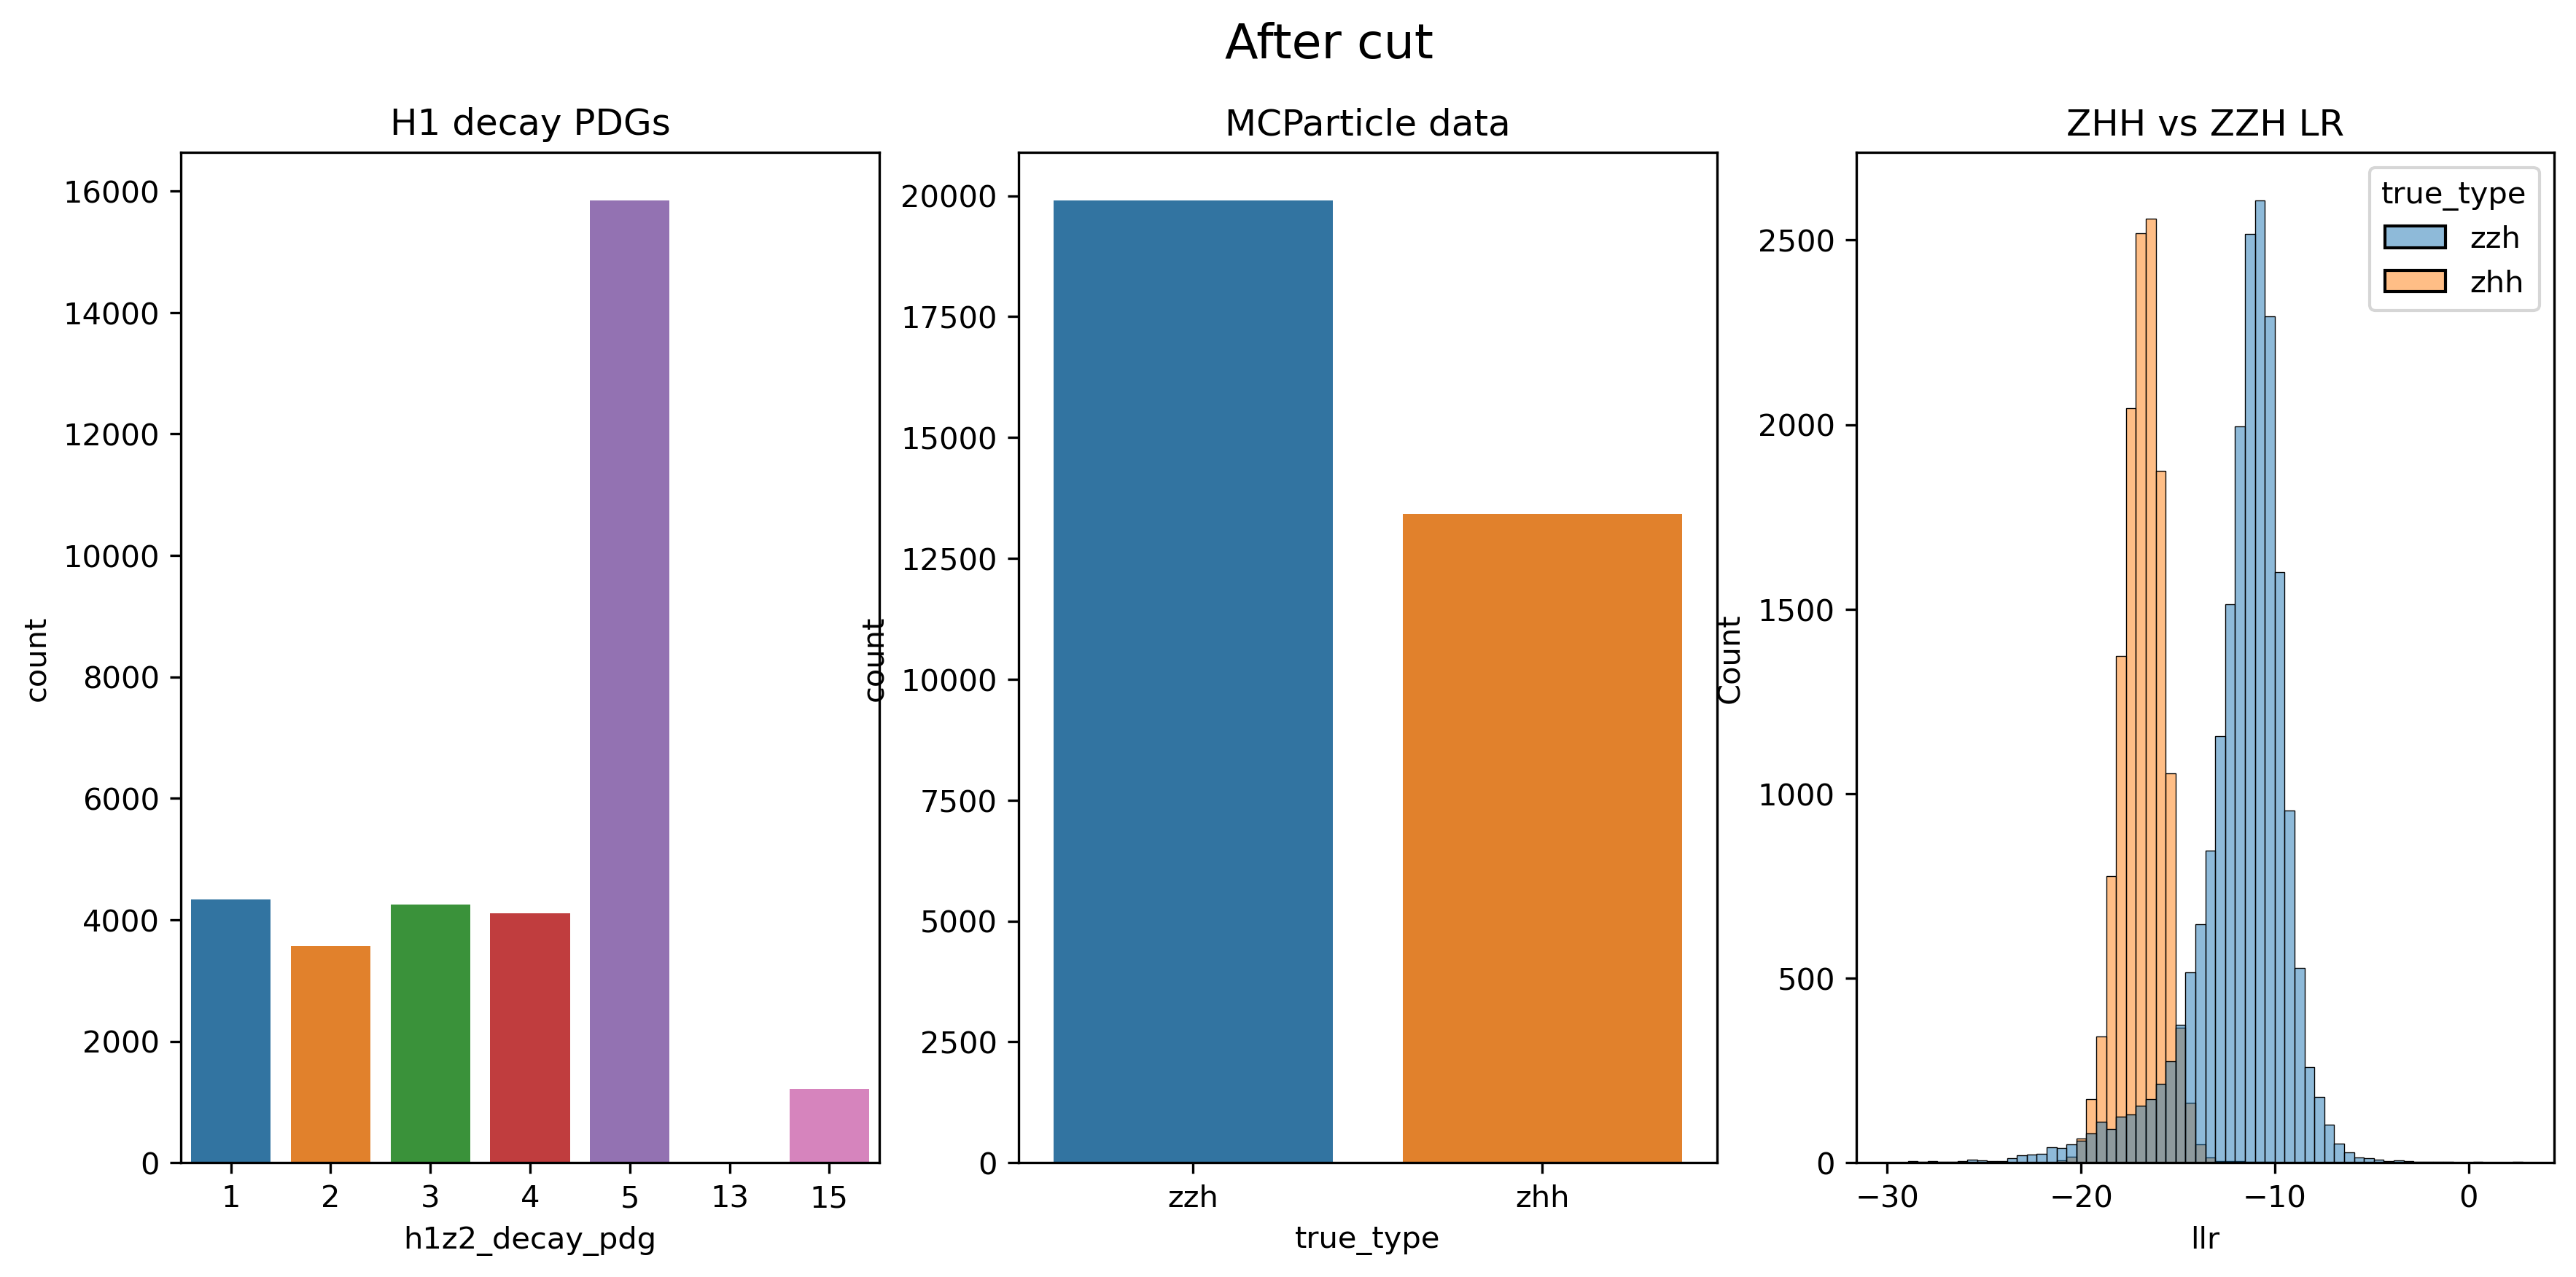

In [17]:
d = data_cut
fig, axes = plt.subplots(1,3, figsize=(14, 6), dpi=300)
fig.suptitle("After cut", fontsize=16)

ax = sns.countplot(d, x="h1z2_decay_pdg", ax=axes[0])
ax.set_title("H1 decay PDGs")

ax = sns.countplot(d, x="true_type", ax=axes[1])
ax.set_title("MCParticle data")

ax = sns.histplot(d, x="llr", hue="true_type", bins=64, ax=axes[2])
ax.set_title("ZHH vs ZZH LR")

In [14]:
true_zhh = data_cut[data_cut["is_zhh"] == 1]
true_zzh = data_cut[data_cut["is_zzh"] == 1]

In [15]:
print(true_zhh.shape[0], true_zzh.shape[0])

13419 19900


In [20]:
true_zhh_split = split_event_tree(true_zhh)
true_zzh_split = split_event_tree(true_zzh)

Text(0.5, 1.0, 'True ZHH MCParticles')

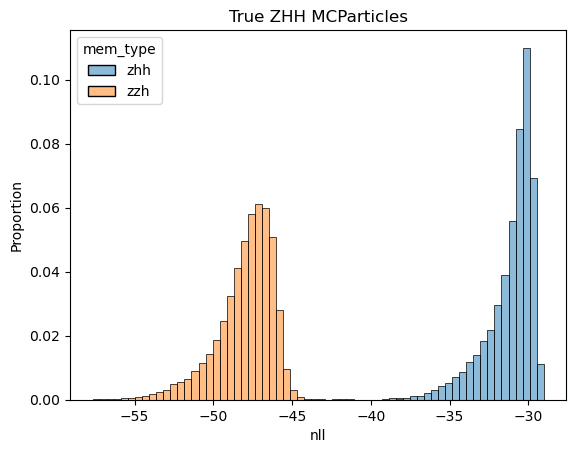

In [124]:
ax = sns.histplot(true_zhh_split, x="nll", hue="mem_type", bins=64, stat="proportion")
ax.set_title("True ZHH MCParticles")

In [128]:
true_zzh_split.reset_index(drop=True, inplace=True)
true_zzh_split

,run,event,is_zhh,is_zzh,h1_decay_pdg,z2_decay_pdg,sigma,zhh_sigmall,zhh_sigmalr,zhh_sigmarl,...,zzh_z2f2_pz,zzh_h_e,zzh_h_px,zzh_h_py,zzh_h_pz,true_type,h1z2_decay_pdg,nll,llr,mem_type
0,403011,1,0,1,0.0,3.0,7.344602e-14,6.965651e-14,3.789516e-15,3.805584e-15,...,124.031075,157.041733,72.794846,-53.599247,-29.413172,zzh,3,-30.242226,-12.641044,zhh
1,403011,2,0,1,0.0,3.0,4.030331e-15,3.575435e-15,4.548957e-16,4.571881e-16,...,11.577676,207.198273,-61.250061,-57.741375,142.198761,zzh,3,-33.144928,-13.411046,zhh
2,403011,3,0,1,0.0,4.0,5.704280e-14,2.816861e-14,2.887418e-14,2.887788e-14,...,0.089793,131.937668,35.247631,13.085950,19.206999,zzh,4,-30.494975,-9.337396,zhh
3,403011,4,0,1,0.0,4.0,5.946260e-15,1.461537e-15,4.484724e-15,4.473190e-15,...,-30.268082,220.370789,23.868135,-177.702896,-28.111895,zzh,4,-32.756014,-11.228584,zhh
4,403011,5,0,1,0.0,5.0,1.256231e-14,1.136108e-14,1.201230e-15,1.202365e-15,...,61.523773,139.716232,12.830882,56.313324,-23.660160,zzh,5,-32.008075,-16.234907,zhh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39795,403011,19896,0,1,NaN,NaN,2.275090e-18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,zzh,5,-40.624512,-10.832258,zzh
39796,403011,19897,0,1,NaN,NaN,6.323993e-20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,zzh,1,-44.207351,-11.126942,zzh
39797,403011,19898,0,1,NaN,NaN,2.782756e-22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,zzh,2,-49.633430,-10.867312,zzh
39798,403011,19899,0,1,NaN,NaN,6.431234e-19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,zzh,2,-41.887950,-11.220890,zzh


Text(0.5, 1.0, 'True ZZH MCParticles')

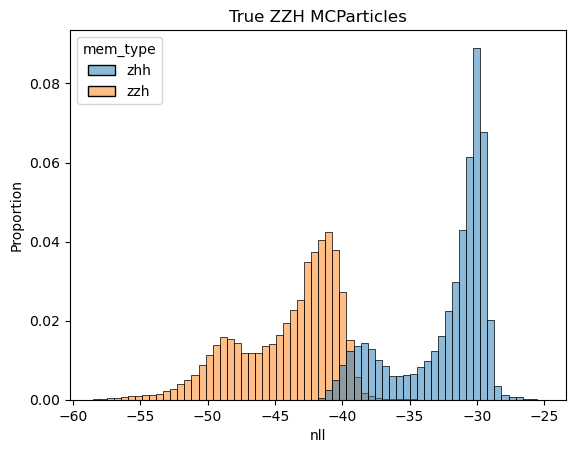

In [129]:
ax = sns.histplot(true_zzh_split, x="nll", hue="mem_type", bins=64, stat="proportion")
ax.set_title("True ZZH MCParticles")